## Linear Regression with Gradient Descent in the practice
So now we are working with the gradient descent techniques in practice for the first time! The concepts we are now practicing will serve us well during the rest of the book.
Let's start by importing the needed library as always.
We will use numpy for numeric processing, and seaborn and matplotlib for representation.


In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
sns.set(style='whitegrid', context='notebook')

The loss function will be the guide for us to know how well we are doing. As seen on the theoretical part, the least squares method will be used.
[infobox]
You can review the J or loss function definition and properties on the previous sections.
[/infobox]
So this least_squares functions, will receive the current regression line parameters $b_0$ and $b_0$, and the data elements, to measure how good is our representation of the reality.

In [2]:
def least_squares(b0, b1, points):
    totalError = 0
    N=float(len(points))
    for x,y in points:
        totalError += (y - (b1 * x + b0)) ** 2
    return totalError / 2.*N

Here we will define each step of the recurrence, as parameters we will receive the current $b_0$ and $b_1$, the points used to train the model, and the learning rate.
On line 5 of the step_gradient function, we see the calculation of both two gradients, and then we create the new_b0 and new_b1 variables, giving a step from the current values, scaled by the learning rate.
In the last line, we return the updated values, and the current error level after all points have been used for the gradient.

In [3]:
def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradient = 0
    b1_gradient = 0
    N = float(len(points))
    for x,y in points:
        b0_gradient += (1/N) * (y - ((b1_current * x) + b0_current))
        b1_gradient += (1/N) * x * (y - ((b1_current * x) + b0_current))
    new_b0 = b0_current + (learningRate * b0_gradient)
    new_b1 = b1_current + (learningRate * b1_gradient)
    return [new_b0, new_b1, least_squares(new_b0, new_b1, points)]

Then we define a function which will run a complete training of out model, so we can check all the combination of parameters on one place.
This function 

In [4]:
def run_gradient_descent(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    slope=[]
    intersect=[]
    error=[]
    for i in range(num_iterations):
        b0, b1 , e= step_gradient(b0, b1, np.array(points), learning_rate)
        slope.append(b1)
        intersect.append(b0)
        error.append(e)
    return [b0, b1, e, slope, intersect,error]

Well, time to try our model! Let's start loading the Irid dataset again, for reference, and as a mean of checking the correcness of our results.
We will use the petal width and petal length parameters, which we have already consulted and they are good candidates for a linear regression.
The dstack command from numpy allows us to merge the two columns, which we converted as a list to discard the column headers, the only caveat is that the resulting list has an unused extra dimension, which we discard using the [0] index selector.

In [5]:
iris = sns.load_dataset('iris')
X=iris['petal_width'].tolist()
Y=iris['petal_length'].tolist()
points=np.dstack((X,Y))[0]

So let's try out model to what it could seem good initial parameters, a 0.001 learning rate, initial parameters at 0, and 1000 iterations, lets see how it behaves:

In [6]:
learning_rate = 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)

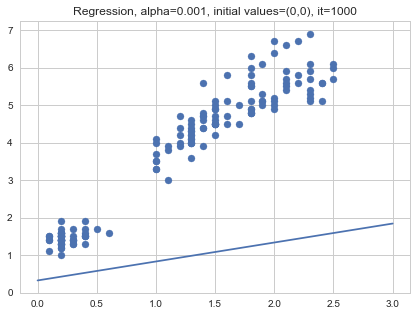

In [7]:
plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr=np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.001, initial values=(0,0), it=1000');

Well, that's bad, clearly we are not yet there, let's see what happened with the error during training:

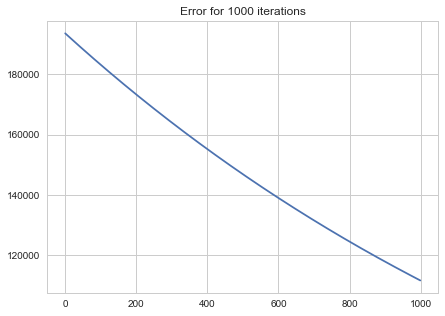

In [8]:
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations');

The process seems to be somewhat working, but a bit slow, maybe we can try to increase the step by a factor of 10, to see if it converges fast? Let's check:'

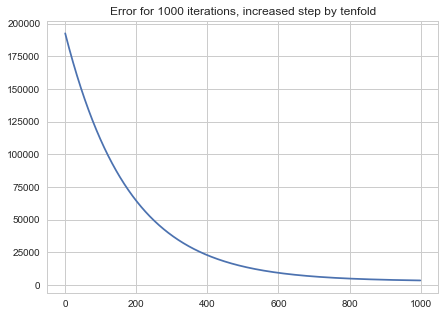

In [9]:
learning_rate = 0.001 #Last one was 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, increased step by tenfold');

That was Better! The process converges much faster, lets check how the regressed line looks now:

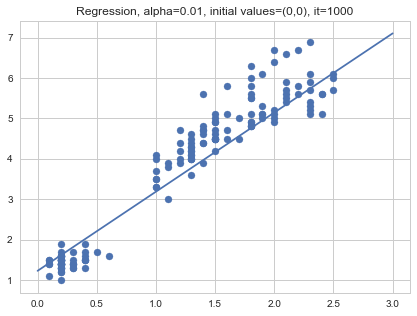

In [10]:
plt.figure(figsize=(7,5))
plt.scatter(X,Y)
xr=np.arange(0,3.5)
plt.plot(xr,(xr*b1)+b0);
plt.title('Regression, alpha=0.01, initial values=(0,0), it=1000');

Yes! it looks much better. We could think we are done yet, but a developer always want to go faster. Let's see what would occur if we wanted to go faster, with an enormous step of 2, for example:

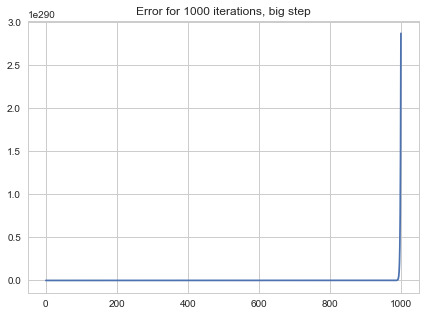

In [11]:
learning_rate = 0.85 #LAst one was 0.0001
initial_b0 = 0 
initial_b1 = 0 
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, big step');

This is just a bad move, as you can see, the error finally went to infinite! What happens here? Simply the steps we are taking are so radical, that instead of slicing on the imaginary bowl we described before, we are just jumping around the surface, and as the iterations advance, we began to escalate the accumulated errors without control.
Another measure that could be taken, is to improve our seed values, which as you have seen started with a value of 0. This is a very bad idea in general for steepest descent, especially when you are working with not normalized data. There are more reasons for this, which you can find in more advanced bibliography. So let's try to initialize the parameter on a pseudo-random location, in order to allow the graphics to be the same across the code examples, and see what happens:

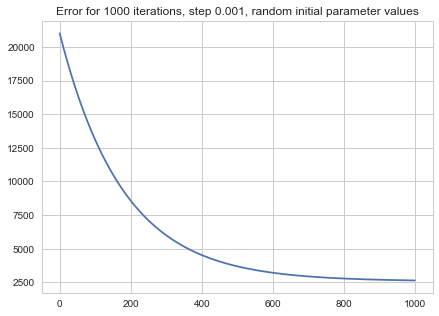

In [12]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values');

As you see, even if you have the same sloppy error rate, the initial error value decreases tenfold (from 2e5 to 2e4). Now let's try a last technique to improve the convergence of the parameters, based on the normalization of the input values, as you have already studied in Chapter 2: It consists on centering and scaling the data. What's the effect of that operations on the data? Using a graphical image, when data is not normalized, the error surface tends to be shallow and the values could oscilate a lot. The normalization transform that data into a more deep surface, with more definite gradients towards the center.

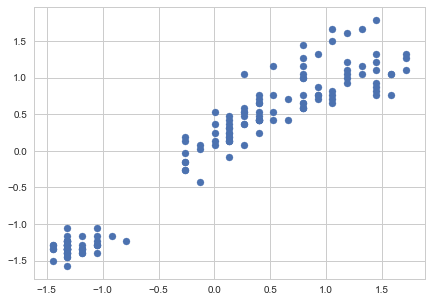

In [13]:
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
x_mean =np.mean(points[:,0])
y_mean = np.mean(points[:,1])
x_std = np.std(points[:,0])
y_std = np.std(points[:,1])

X_normalized = (points[:,0] - x_mean)/x_std
Y_normalized = (points[:,1] - y_mean)/y_std

plt.figure(figsize=(7,5))
plt.scatter(X_normalized,Y_normalized)

Now that we have this set of clean an tidy data, lets try another time with the last slow convergence parameters, and see what happens with the error minimization speed:

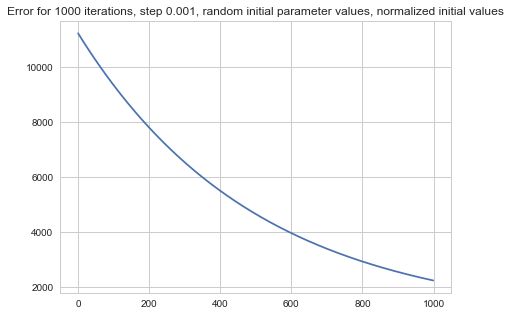

In [14]:
points=np.dstack((X_normalized,Y_normalized))[0]
learning_rate = 0.001 #Same as last time
initial_b0 = 0.8 #pseudo random value
initial_b1 = 1.5 #pseudo random value
num_iterations = 1000
[b0, b1, e, slope, intersect, error] = run_gradient_descent(points, initial_b0, initial_b1, learning_rate, num_iterations)
plt.figure(figsize=(7,5))
xr=np.arange(0,1000)
plt.plot(xr,np.array(error).transpose());
plt.title('Error for 1000 iterations, step 0.001, random initial parameter values, normalized initial values');

A very good starting point indeed, just by normalizing the data we have half the initial error values, and for the error went down 20% after 1000 iterations. The only thing we have to remember is to denormalize after we have the results, to have the initial scale and data center.
So that's all for now with Gradient descent, we will be revisiting it in the next chapters, for new challenges.